# SQL Analysis of the Chinook Database: Exploring Sales, Customers, and Trends

In [10]:
# IMPORIING THE NECCESSARY LIBRARIES

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [11]:
# Connect to the SQLite database
conn = sqlite3.connect("C:/Users/Dharini/Downloads/Chinook_Sqlite.sqlite")


In [12]:
# Create a cursor object
cursor = conn.cursor()

In [13]:
# Execute a query to fetch the list of table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch the results
tables = cursor.fetchall()

# Display the table names
for table in tables:
    print(table[0])

Album
Artist
Customer
Employee
Genre
Invoice
InvoiceLine
MediaType
Playlist
PlaylistTrack
Track


In [14]:
# List of table names
table_names = ['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']

# Iterate over the table names
for table_name in table_names:
    # Read the first 5 rows from the current table into a DataFrame
    df = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 5", conn)

    # Print table name
    print(f"\nFirst 5 rows from {table_name} table:")

    # Display the DataFrame
    print(df)


First 5 rows from Album table:
   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3

First 5 rows from Artist table:
   ArtistId               Name
0         1              AC/DC
1         2             Accept
2         3          Aerosmith
3         4  Alanis Morissette
4         5    Alice In Chains

First 5 rows from Customer table:
   CustomerId  FirstName     LastName  \
0           1       Luís    Gonçalves   
1           2     Leonie       Köhler   
2           3   François     Tremblay   
3           4      Bjørn       Hansen   
4           5  František  Wichterlová   

                                            Company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A. 

IDENTIFYING PATTERNS SUCH AS PEAK SALES PERIODS AND SEASONAL TRENDS

In [18]:
#Retrieve sales data from the Invoice table
sales_query = """
SELECT strftime('%Y-%m', InvoiceDate) AS YearMonth, SUM(Total) AS MonthlyTotal
FROM Invoice
GROUP BY YearMonth;
"""

#Convert the data into a DataFrame
sales_df = pd.read_sql_query(sales_query, conn)

# Convert YearMonth to datetime format
sales_df['YearMonth'] = pd.to_datetime(sales_df['YearMonth'])
print(sales_df)

    YearMonth  MonthlyTotal
0  2009-01-01         35.64
1  2009-02-01         37.62
2  2009-03-01         37.62
3  2009-04-01         37.62
4  2009-05-01         37.62
5  2009-06-01         37.62
6  2009-07-01         37.62
7  2009-08-01         37.62
8  2009-09-01         37.62
9  2009-10-01         37.62
10 2009-11-01         37.62
11 2009-12-01         37.62
12 2010-01-01         52.62
13 2010-02-01         46.62
14 2010-03-01         44.62
15 2010-04-01         37.62
16 2010-05-01         37.62
17 2010-06-01         37.62
18 2010-07-01         37.62
19 2010-08-01         37.62
20 2010-09-01         36.63
21 2010-10-01         37.62
22 2010-11-01         37.62
23 2010-12-01         37.62
24 2011-01-01         37.62
25 2011-02-01         37.62
26 2011-03-01         37.62
27 2011-04-01         51.62
28 2011-05-01         42.62
29 2011-06-01         50.62
30 2011-07-01         37.62
31 2011-08-01         37.62
32 2011-09-01         37.62
33 2011-10-01         37.62
34 2011-11-01       

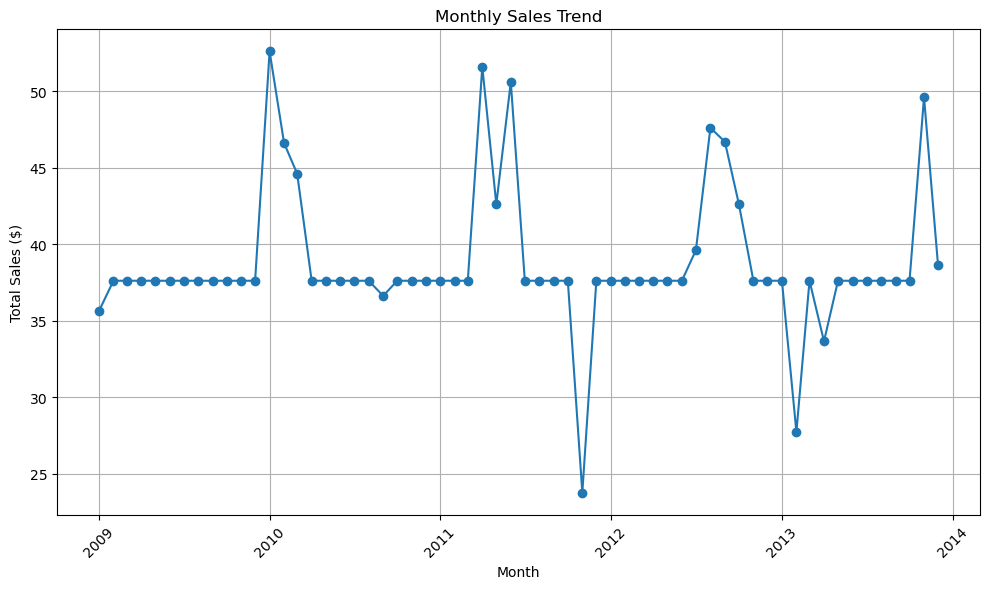

In [19]:
#Visualize sales data using line chart
plt.figure(figsize=(10, 6))
plt.plot(sales_df['YearMonth'], sales_df['MonthlyTotal'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show() 

There are peaks in sales during certain months (e.g., January 2010, April 2011, November 2013), which may correspond to specific seasons, holidays, or promotional events.
And also there is generally a level of stability in sales over time, indicating a consistent level of demand for the products or services offered.

CUSTOMER BEHAVIOR ANALYSIS

In [20]:
# Retrieve relevant data from the database
customer_query = """
SELECT 
    c.CustomerId,
    c.FirstName || ' ' || c.LastName AS CustomerName,
    COUNT(i.InvoiceId) AS TotalPurchases,
    SUM(i.Total) AS TotalSpent
FROM Customer c
LEFT JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId;
"""

#Convert the data into a DataFrame
customer_df = pd.read_sql_query(customer_query, conn)

# Analyze customer behavior
# 1. Frequency of purchases
avg_purchases_per_customer = customer_df['TotalPurchases'].mean()

# 2. Average order value
avg_order_value = customer_df['TotalSpent'].mean()

# 3. Customer retention rates
repeat_customers = customer_df[customer_df['TotalPurchases'] > 1]
retention_rate = len(repeat_customers) / len(customer_df) * 100

# Display the results
print("Customer Behavior Analysis:")
print("----------------------------")
print("Average purchases per customer:", avg_purchases_per_customer)
print("Average order value: $", avg_order_value)
print("Customer retention rate: {:.2f}%".format(retention_rate))



Customer Behavior Analysis:
----------------------------
Average purchases per customer: 6.983050847457627
Average order value: $ 39.46779661016949
Customer retention rate: 100.00%


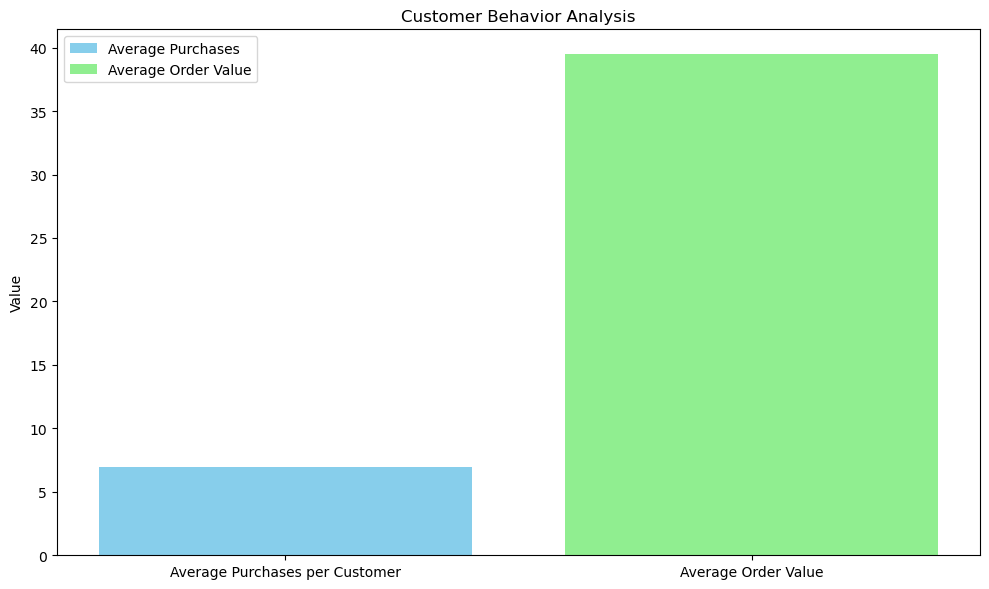

In [22]:
# Create bar plots for visualization
plt.figure(figsize=(10, 6))
# Plot average purchases per customer
plt.bar('Average Purchases per Customer', avg_purchases_per_customer, color='skyblue', label='Average Purchases')
# Plot average order value
plt.bar('Average Order Value', avg_order_value, color='lightgreen', label='Average Order Value')

# Add labels and title
plt.ylabel('Value')
plt.title('Customer Behavior Analysis')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


These metrics suggest that the business has a strong customer base with high levels of engagement and loyalty. 
Customers are making repeat purchases at a consistent rate, and the average order value indicates that they are spending a significant amount per transaction. 
This is encouraging for the business's long-term success and growth.

POPULAR GENRES BASED ON TRACKS SOLD

In [23]:
#Retrieve relevant data from the database
genre_query = """
SELECT 
    g.Name AS Genre,
    COUNT(il.TrackId) AS TotalTracksSold
FROM Genre g
JOIN Track t ON g.GenreId = t.GenreId
JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY g.GenreId
ORDER BY TotalTracksSold DESC;
"""
# Convert the data into a DataFrame
genre_df = pd.read_sql_query(genre_query, conn)
print(genre_df)


                 Genre  TotalTracksSold
0                 Rock              835
1                Latin              386
2                Metal              264
3   Alternative & Punk              244
4                 Jazz               80
5                Blues               61
6             TV Shows               47
7            Classical               41
8             R&B/Soul               41
9               Reggae               30
10               Drama               29
11                 Pop               28
12    Sci Fi & Fantasy               20
13          Soundtrack               20
14         Hip Hop/Rap               17
15          Bossa Nova               15
16         Alternative               14
17               World               13
18   Electronica/Dance               12
19         Heavy Metal               12
20      Easy Listening               10
21              Comedy                9
22     Science Fiction                6
23       Rock And Roll                6


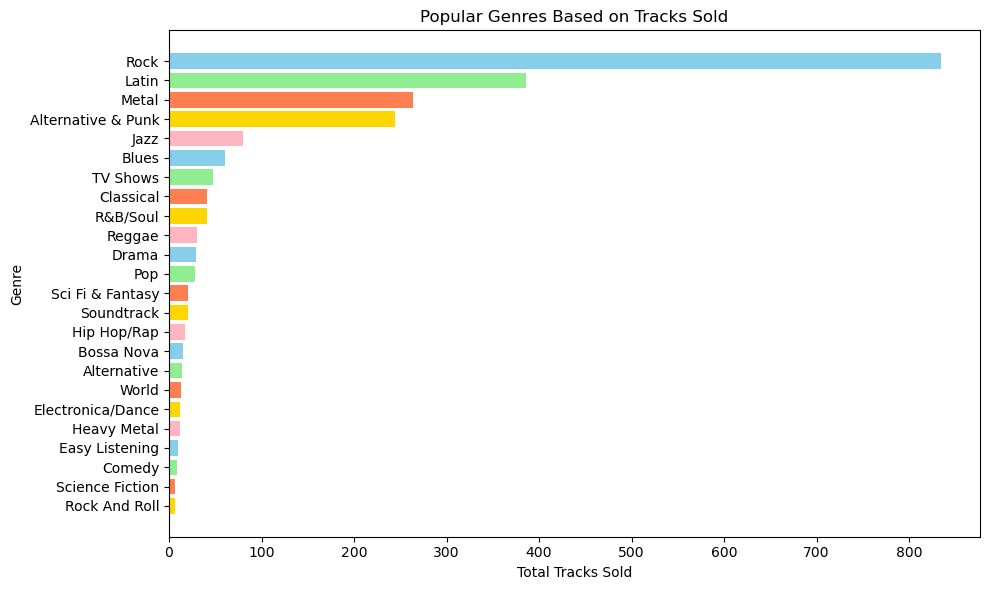

In [25]:
#Visualize the data
#list of colors
colors = ['#87CEEB', '#90EE90', '#FF7F50', '#FFD700', '#FFB6C1']
plt.figure(figsize=(10, 6))
plt.barh(genre_df['Genre'], genre_df['TotalTracksSold'], color=colors)
plt.xlabel('Total Tracks Sold')
plt.ylabel('Genre')
plt.title('Popular Genres Based on Tracks Sold')
plt.gca().invert_yaxis()  # Invert y-axis to have the genre with the most tracks sold at the top
plt.tight_layout()
plt.show()


1. Dominance of Rock and Latin Genres:This indicates a strong demand for music within these genres, suggesting that they are favored by a significant portion of the customer base.
2. Diversity in Genre Preferences: While Rock and Latin genres lead in terms of total tracks sold, there is also diversity in genre preferences among customers. Genres such as Metal, Alternative & Punk, Jazz, and Blues also have notable sales figures, albeit to a lesser extent. This suggests that the customer base appreciates a variety of musical styles and genres.
3. Niche Genres and Limited Sales: Some genres, such as TV Shows, Classical, and R&B/Soul, have fewer tracks sold compared to others. This may indicate that these genres cater to a more niche audience or have limited appeal compared to more mainstream genres like Rock and Latin. 

ANALYSIS OF TOP SELLING TRACKS AND ALBUMS


In [26]:
# Retrieve relevant data from the database
top_tracks_query = """
SELECT 
    t.Name AS TrackName,
    a.Title AS AlbumTitle,
    SUM(il.Quantity) AS TotalQuantitySold
FROM Track t
JOIN InvoiceLine il ON t.TrackId = il.TrackId
JOIN Album a ON t.AlbumId = a.AlbumId
GROUP BY t.TrackId
ORDER BY TotalQuantitySold DESC
LIMIT 10;
"""
# Convert the data into a DataFrame
top_tracks_df = pd.read_sql_query(top_tracks_query, conn)
print(top_tracks_df)

                   TrackName                             AlbumTitle  \
0          Balls to the Wall                      Balls to the Wall   
1           Inject The Venom  For Those About To Rock We Salute You   
2                 Snowballed  For Those About To Rock We Salute You   
3                   Overdose                      Let There Be Rock   
4            Deuces Are Wild                               Big Ones   
5             Not The Doctor                     Jagged Little Pill   
6          Por Causa De Você                         Warner 25 Anos   
7  Welcome Home (Sanitarium)         Plays Metallica By Four Cellos   
8                  Snowblind        Black Sabbath Vol. 4 (Remaster)   
9                 Cornucopia        Black Sabbath Vol. 4 (Remaster)   

   TotalQuantitySold  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2  
5                  2  
6                  2  
7                  2  
8          

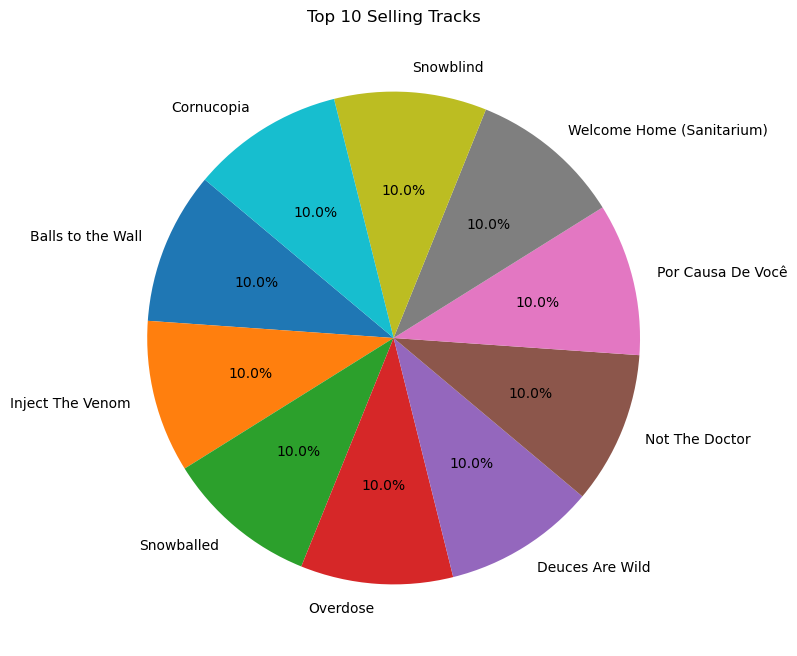

In [29]:
# Plot the data using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_tracks_df['TotalQuantitySold'], labels=top_tracks_df['TrackName'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Selling Tracks')
plt.show()

This analysis highlights each of the top-selling tracks has sold a total quantity of 2 units. This suggests a level of consistency in sales performance across these tracks.

ANALYZING REVENUE TRENDS OVER TIME TO IDENTIFY GROWTH PATTERNS

In [30]:
#Retrieve relevant data from the database
revenue_query = """
SELECT 
    strftime('%Y-%m', InvoiceDate) AS YearMonth,
    SUM(Total) AS TotalRevenue
FROM Invoice
GROUP BY YearMonth;
"""
#Convert the data into a DataFrame
revenue_df = pd.read_sql_query(revenue_query, conn)
print(revenue_df)


   YearMonth  TotalRevenue
0    2009-01         35.64
1    2009-02         37.62
2    2009-03         37.62
3    2009-04         37.62
4    2009-05         37.62
5    2009-06         37.62
6    2009-07         37.62
7    2009-08         37.62
8    2009-09         37.62
9    2009-10         37.62
10   2009-11         37.62
11   2009-12         37.62
12   2010-01         52.62
13   2010-02         46.62
14   2010-03         44.62
15   2010-04         37.62
16   2010-05         37.62
17   2010-06         37.62
18   2010-07         37.62
19   2010-08         37.62
20   2010-09         36.63
21   2010-10         37.62
22   2010-11         37.62
23   2010-12         37.62
24   2011-01         37.62
25   2011-02         37.62
26   2011-03         37.62
27   2011-04         51.62
28   2011-05         42.62
29   2011-06         50.62
30   2011-07         37.62
31   2011-08         37.62
32   2011-09         37.62
33   2011-10         37.62
34   2011-11         23.76
35   2011-12         37.62
3

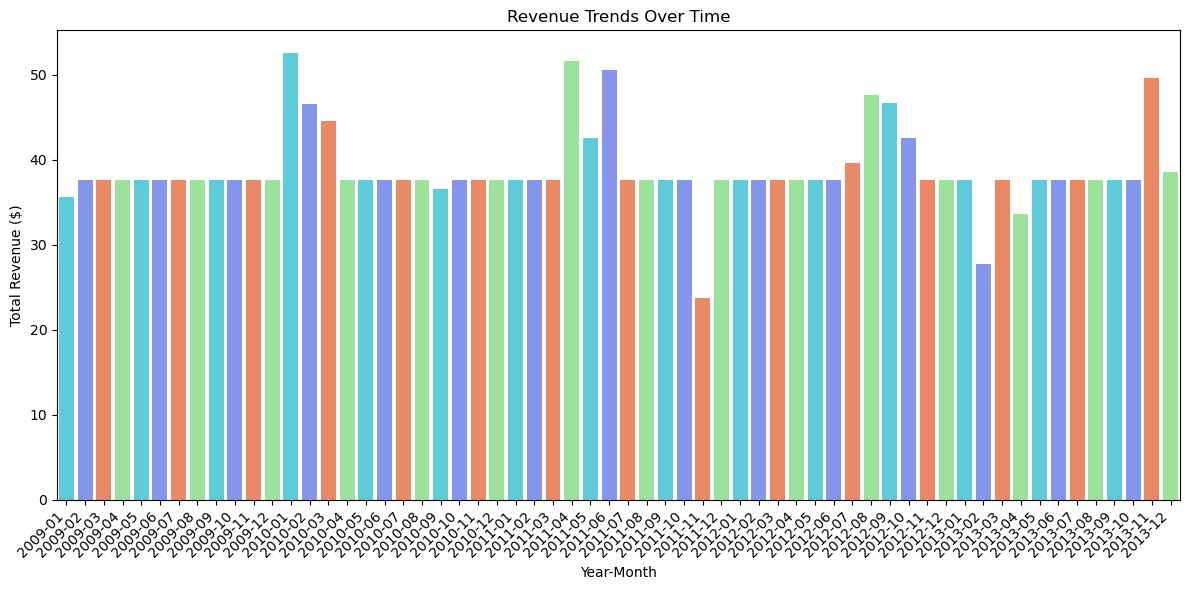

In [35]:
#Visualize the data
colors_dict = {
    'Revenue': '#4BD9EC',  
    'Category1': '#758BFD',
    'Category2': '#FF7F50',
    'Category3': '#90EE90',
}
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='YearMonth', y='TotalRevenue', palette=colors_dict.values(), data=revenue_df)
plt.title('Revenue Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Based on the revenue trends over time, it appears that revenue remains relatively stable for many months, with occasional fluctuations observed. 

ANALYZING THE SALES VOLUME AND REVENUE GENERATED BY EACH COUNTRY TO IDENTIFY TRENDS AND PATTERNS

In [36]:
#Retrieve sales data by country
sales_by_country_query = """
SELECT
    BillingCountry AS Country,
    COUNT(DISTINCT InvoiceId) AS TotalOrders,
    SUM(Total) AS TotalRevenue
FROM Invoice
GROUP BY Country
ORDER BY TotalRevenue DESC;
"""
#Convert the data into a DataFrame
sales_by_country_df = pd.read_sql_query(sales_by_country_query, conn)
print(sales_by_country_df)


           Country  TotalOrders  TotalRevenue
0              USA           91        523.06
1           Canada           56        303.96
2           France           35        195.10
3           Brazil           35        190.10
4          Germany           28        156.48
5   United Kingdom           21        112.86
6   Czech Republic           14         90.24
7         Portugal           14         77.24
8            India           13         75.26
9            Chile            7         46.62
10         Ireland            7         45.62
11         Hungary            7         45.62
12         Austria            7         42.62
13         Finland            7         41.62
14     Netherlands            7         40.62
15          Norway            7         39.62
16          Sweden            7         38.62
17          Poland            7         37.62
18           Italy            7         37.62
19         Denmark            7         37.62
20       Australia            7   

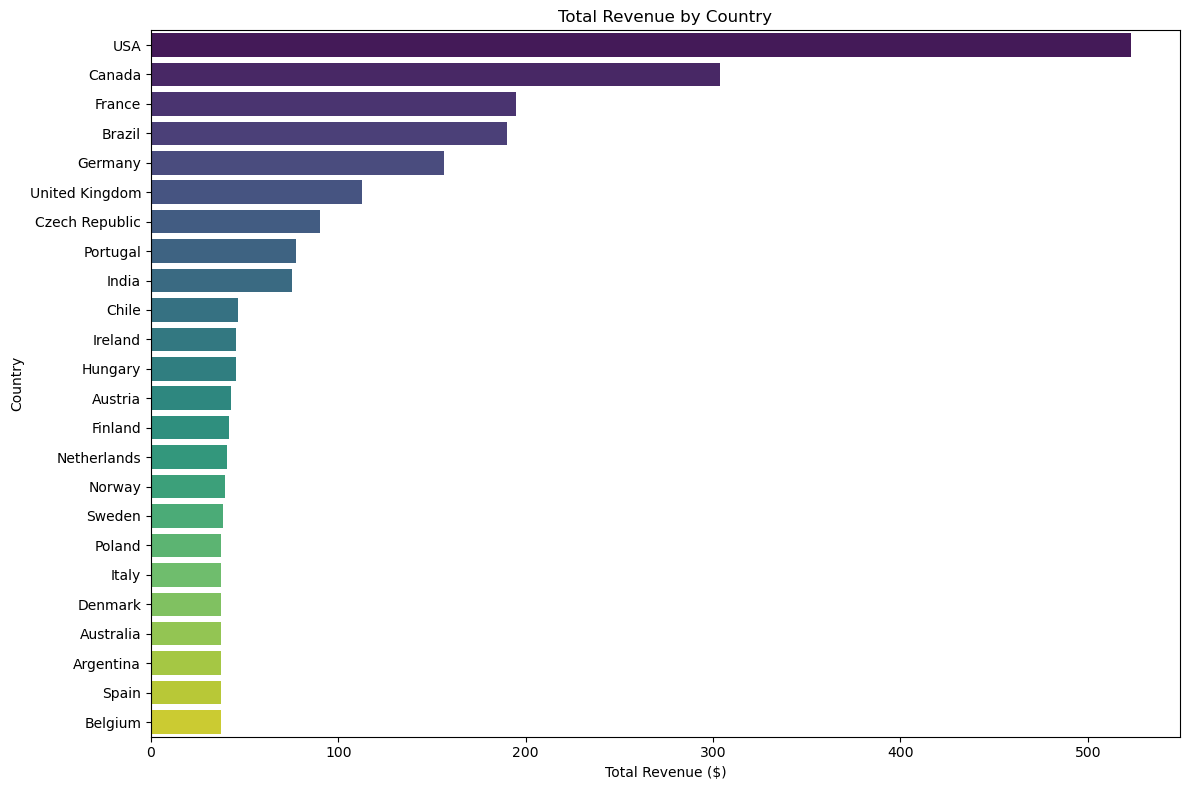

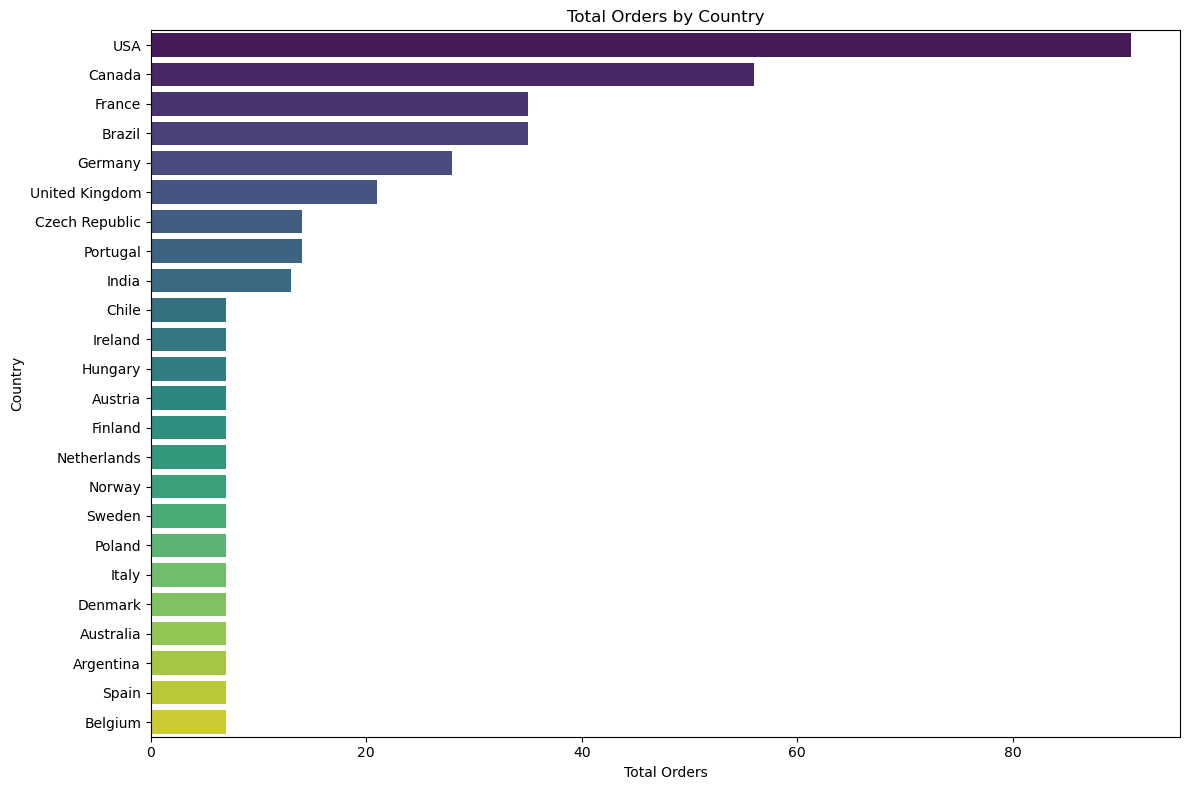

In [37]:
# Visualize the data
plt.figure(figsize=(12, 8))
sns.barplot(x='TotalRevenue', y='Country', data=sales_by_country_df, palette='viridis')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Country')
plt.title('Total Revenue by Country')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='TotalOrders', y='Country', data=sales_by_country_df, palette='viridis')
plt.xlabel('Total Orders')
plt.ylabel('Country')
plt.title('Total Orders by Country')
plt.tight_layout()
plt.show()

1. The USA has the highest total number of orders and revenue, indicating it is a key market for sales.
2. Other countries such as Canada, France, and Brazil also contribute significantly to sales volume and revenue.
3. There is a trend of declining sales volume and revenue as we move down the list of countries, suggesting varying levels of market penetration and customer engagement across different regions.

1. What is the distribution of customers by country?

In [41]:
# Define the SQL query
query = """
    SELECT Country, COUNT(CustomerId) AS CustomerCount
    FROM Customer
    GROUP BY Country
    ORDER BY CustomerCount DESC;
"""

customer_distribution = pd.read_sql_query(query, conn)
print("Distribution of customers by country:")
print(customer_distribution)

Distribution of customers by country:
           Country  CustomerCount
0              USA             13
1           Canada              8
2           France              5
3           Brazil              5
4          Germany              4
5   United Kingdom              3
6         Portugal              2
7            India              2
8   Czech Republic              2
9           Sweden              1
10           Spain              1
11          Poland              1
12          Norway              1
13     Netherlands              1
14           Italy              1
15         Ireland              1
16         Hungary              1
17         Finland              1
18         Denmark              1
19           Chile              1
20         Belgium              1
21         Austria              1
22       Australia              1
23       Argentina              1


The majority of customers are from the USA, followed by Canada. 
The remaining countries have varying numbers of customers, with most having only one or two customers each.

2. Is there a correlation between the number of tracks purchased and the total revenue generated?

In [42]:
#Define the SQL query
query = """
    SELECT InvoiceId, SUM(Quantity) AS TotalTracksPurchased, SUM(UnitPrice * Quantity) AS TotalRevenue
    FROM InvoiceLine
    GROUP BY InvoiceId;
"""
invoice_data = pd.read_sql_query(query, conn)

# Calculating the correlation coefficient
correlation_coefficient = invoice_data['TotalTracksPurchased'].corr(invoice_data['TotalRevenue'])
# Determine if there is a correlation
if correlation_coefficient > 0:
    correlation_result = "positive correlation"
elif correlation_coefficient < 0:
    correlation_result = "negative correlation"
else:
    correlation_result = "no correlation"
print(f"Correlation coefficient: {correlation_coefficient}")
print(f"There is a {correlation_result} between the number of tracks purchased and the total revenue generated.")


Correlation coefficient: 0.9662574692303564
There is a positive correlation between the number of tracks purchased and the total revenue generated.


3. How do sales vary by country? Are there any notable patterns or discrepancies?

In [43]:
#Define the SQL query
query = """
    SELECT 
        BillingCountry AS Country,
        COUNT(DISTINCT CustomerId) AS TotalCustomers,
        SUM(Total) AS TotalSales,
        AVG(Total) AS AverageOrderValue,
        SUM(Total) / COUNT(DISTINCT CustomerId) AS AverageSalesPerCustomer
    FROM Invoice
    GROUP BY Country
    ORDER BY TotalSales DESC;
"""

sales_by_country = pd.read_sql_query(query, conn)
print("Sales variation by country:")
print(sales_by_country)

Sales variation by country:
           Country  TotalCustomers  TotalSales  AverageOrderValue  \
0              USA              13      523.06           5.747912   
1           Canada               8      303.96           5.427857   
2           France               5      195.10           5.574286   
3           Brazil               5      190.10           5.431429   
4          Germany               4      156.48           5.588571   
5   United Kingdom               3      112.86           5.374286   
6   Czech Republic               2       90.24           6.445714   
7         Portugal               2       77.24           5.517143   
8            India               2       75.26           5.789231   
9            Chile               1       46.62           6.660000   
10         Ireland               1       45.62           6.517143   
11         Hungary               1       45.62           6.517143   
12         Austria               1       42.62           6.088571   
13    

The sales vary by country, with the USA leading in total sales and number of customers. 
The average order value and sales per customer are relatively consistent across countries.

4. How frequently do customers make repeat purchases?

In [49]:
# Define the SQL query to count repeat purchases per customer
query = """
    SELECT 
        CustomerId,
        COUNT(*) - 1 AS RepeatPurchases
    FROM 
        Invoice
    GROUP BY 
        CustomerId;
"""

repeat_purchase_count = pd.read_sql_query(query, conn)

# Calculating the total number of customers
total_customers = repeat_purchase_count.shape[0]

# Calculating the number of customers who made repeat purchases
repeat_customers = repeat_purchase_count[repeat_purchase_count['RepeatPurchases'] > 0].shape[0]

# Calculating the frequency of repeat purchases
frequency_of_repeat_purchases = repeat_customers / total_customers
print(f"The frequency of repeat purchases is: {frequency_of_repeat_purchases:.2%}")


The frequency of repeat purchases is: 100.00%


5. How does the revenue from digital media compare to that from physical media?

In [50]:
# Define the SQL query to calculate revenue from digital media
query_digital = """
    SELECT 
        SUM(i.Total) AS DigitalRevenue
    FROM 
        Invoice i
    INNER JOIN 
        InvoiceLine il ON i.InvoiceId = il.InvoiceId
    INNER JOIN 
        Track t ON il.TrackId = t.TrackId
    INNER JOIN 
        MediaType mt ON t.MediaTypeId = mt.MediaTypeId
    WHERE 
        mt.Name LIKE '%audio%'
"""

# Execute the query and fetch the result for digital revenue
digital_revenue = pd.read_sql_query(query_digital, conn)['DigitalRevenue'][0]

# Define the SQL query to calculate revenue from physical media
query_physical = """
    SELECT 
        SUM(i.Total) AS PhysicalRevenue
    FROM 
        Invoice i
    INNER JOIN 
        InvoiceLine il ON i.InvoiceId = il.InvoiceId
    INNER JOIN 
        Track t ON il.TrackId = t.TrackId
    INNER JOIN 
        MediaType mt ON t.MediaTypeId = mt.MediaTypeId
    WHERE 
        mt.Name NOT LIKE '%audio%'
"""

# Execute the query and fetch the result for physical revenue
physical_revenue = pd.read_sql_query(query_physical, conn)['PhysicalRevenue'][0]

# Display the comparison
print(f"Revenue from digital media: ${digital_revenue:.2f}")
print(f"Revenue from physical media: ${physical_revenue:.2f}")


Revenue from digital media: $19072.72
Revenue from physical media: $1775.90


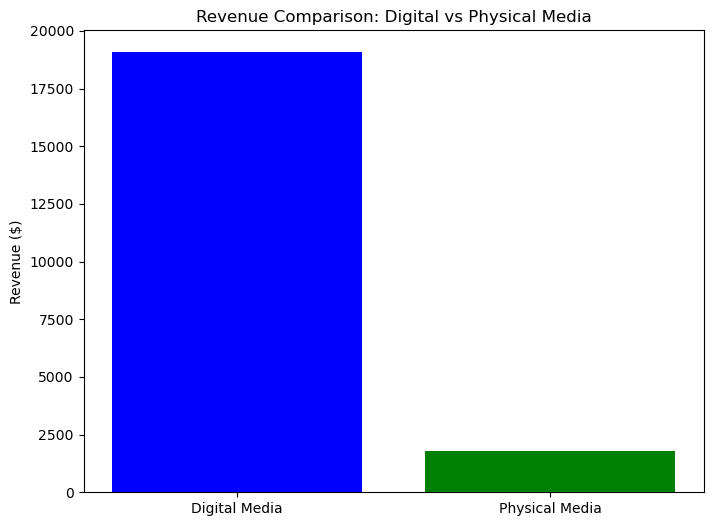

In [51]:
# Plotting
labels = ['Digital Media', 'Physical Media']
revenues = [digital_revenue, physical_revenue]

plt.figure(figsize=(8, 6))
plt.bar(labels, revenues, color=['blue', 'green'])
plt.title('Revenue Comparison: Digital vs Physical Media')
plt.ylabel('Revenue ($)')
plt.show()